In [ ]:
!pip install --extra-index-url https://fiinquant.github.io/fiinquantx/simple fiinquantx

In [2]:


from google.colab import drive
drive.mount('/content/drive')

# Đường dẫn đúng tới folder stock_data
save_path = "/content/drive/MyDrive/stock_data"



Mounted at /content/drive


In [3]:
# Import FiinQuantX
from FiinQuantX import FiinSession
import pandas as pd

# Đăng nhập
username = 'DSTC_30@fiinquant.vn'
password = 'Fiinquant0606'
client = FiinSession(username=username, password=password).login()




In [ ]:
# Lấy toàn bộ tickers thuộc VNINDEX (tức toàn HOSE)
hose_tickers = client.TickerList(ticker="VNINDEX")
print("Số mã HOSE:", len(hose_tickers))
print("10 mã đầu tiên:", hose_tickers[:10])

# Lấy dữ liệu daily từ 2023-nay với nhiều field
data = client.Fetch_Trading_Data(
    realtime=False,
    tickers=hose_tickers,
    fields=['open','high','low','close','volume','bu','sd','fn','fs','fb'],
    adjusted=True,
    by="1d",
    from_date="2023-01-01"
).get_data()

# Lưu ra file CSV trong Drive
file_path = f"{save_path}/HOSE_all_2023.csv"
data.to_csv(file_path, index=False)

print("✅ Đã lưu dữ liệu:", file_path)
print("📊 Kích thước:", data.shape)


In [ ]:
# Lấy toàn bộ tickers thuộc HNXINDEX (tức toàn HNX)
hnx_tickers = client.TickerList(ticker="HNXINDEX")
print("Số mã HNX:", len(hnx_tickers))
print("10 mã đầu tiên:", hnx_tickers[:10])

# Lấy dữ liệu daily từ 2023-nay với nhiều field
hnx_data = client.Fetch_Trading_Data(
    realtime=False,
    tickers=hnx_tickers,
    fields=['open','high','low','close','volume','bu','sd','fn','fs','fb'],
    adjusted=True,
    by="1d",
    from_date="2023-01-01"
).get_data()

# Lưu ra file CSV trong Drive
hnx_file_path = f"{save_path}/HNX_all_2023.csv"
hnx_data.to_csv(hnx_file_path, index=False)

print("✅ Đã lưu dữ liệu:", hnx_file_path)
print("📊 Kích thước:", hnx_data.shape)


In [ ]:
# Lấy toàn bộ tickers thuộc UPCOMINDEX (tức toàn UPCOM)
upcom_tickers = client.TickerList(ticker="UPCOMINDEX")
print("Số mã UPCOM:", len(upcom_tickers))
print("10 mã đầu tiên:", upcom_tickers[:10])

# Lấy dữ liệu daily từ 2023-nay với nhiều field
upcom_data = client.Fetch_Trading_Data(
    realtime=False,
    tickers=upcom_tickers,
    fields=['open','high','low','close','volume','bu','sd','fn','fs','fb'],
    adjusted=True,
    by="1d",
    from_date="2023-01-01"
).get_data()

# Lưu ra file CSV trong Drive
upcom_file_path = f"{save_path}/UPCOM_all_2023.csv"
upcom_data.to_csv(upcom_file_path, index=False)

print("✅ Đã lưu dữ liệu:", upcom_file_path)
print("📊 Kích thước:", upcom_data.shape)


In [ ]:
#tính các chỉ bảo phù hợp MA20,MA50,RSI,MACD,...
import pandas as pd

# Giả sử bạn đã load dữ liệu trading từ CSV
hose = pd.read_csv(f"{save_path}/HOSE_all_2023.csv", parse_dates=["timestamp"])
hnx = pd.read_csv(f"{save_path}/HNX_all_2023.csv", parse_dates=["timestamp"])
upcom = pd.read_csv(f"{save_path}/UPCOM_all_2023.csv", parse_dates=["timestamp"])

# Khởi tạo indicator
fi = client.FiinIndicator()

def add_indicators(df):
    # SMA / EMA
    df["sma20"]  = fi.sma(df["close"], window=20)
    df["sma50"]  = fi.sma(df["close"], window=50)
    df["sma200"] = fi.sma(df["close"], window=200)
    df["ema20"]  = fi.ema(df["close"], window=20)

    # RSI
    df["rsi14"] = fi.rsi(df["close"], window=14)

    # MACD
    df["macd"]        = fi.macd(df["close"], window_fast=12, window_slow=26)
    df["macd_signal"] = fi.macd_signal(df["close"], window_fast=12, window_slow=26, window_sign=9)
    df["macd_diff"]   = fi.macd_diff(df["close"], window_fast=12, window_slow=26, window_sign=9)

    # Bollinger Bands
    df["bb_high"] = fi.bollinger_hband(df["close"], window=20, window_dev=2)
    df["bb_low"]  = fi.bollinger_lband(df["close"], window=20, window_dev=2)

     # ATR
    df["atr14"] = fi.atr(df["high"], df["low"], df["close"], window=14)

    # OBV
    df["obv"] = fi.obv(df["close"], df["volume"])

    # Stochastic Oscillator
    df["stoch_k"] = fi.stoch(df["high"], df["low"], df["close"], window=14)
    df["stoch_d"] = fi.stoch_signal(df["high"], df["low"], df["close"], window=14)

    # ADX
    df["adx"]     = fi.adx(df["high"], df["low"], df["close"], window=14)
    df["adx_pos"] = fi.adx_pos(df["high"], df["low"], df["close"], window=14)
    df["adx_neg"] = fi.adx_neg(df["high"], df["low"], df["close"], window=14)

    return df

# Thêm chỉ báo cho cả 3 sàn
hose = add_indicators(hose)
hnx = add_indicators(hnx)
upcom = add_indicators(upcom)

# Lưu lại
hose.to_csv(f"{save_path}/HOSE_with_TA.csv", index=False)
hnx.to_csv(f"{save_path}/HNX_with_TA.csv", index=False)
upcom.to_csv(f"{save_path}/UPCOM_with_TA.csv", index=False)

print("✅ Đã thêm chỉ báo và lưu vào Drive")


✅ Đã thêm chỉ báo và lưu vào Drive


In [ ]:
# Thiết kế logic lọc cổ phiếu với 16 điều kiện
import pandas as pd

# Load dữ liệu đã có chỉ báo (TA tính sẵn)
hose  = pd.read_csv(f"{save_path}/HOSE_with_TA.csv", parse_dates=["timestamp"])
hnx   = pd.read_csv(f"{save_path}/HNX_with_TA.csv", parse_dates=["timestamp"])
upcom = pd.read_csv(f"{save_path}/UPCOM_with_TA.csv", parse_dates=["timestamp"])

def signal_full_filters(df):
    """
    Tính score ngắn hạn dựa trên 16 điều kiện lọc kỹ thuật.
    Trả về DataFrame với cột: timestamp, close, volume, score, signals, ticker
    """
    signals_list = []

    # Nếu chưa có VMA20, tính trước
    if 'vma20' not in df.columns:
        df['vma20'] = df['volume'].rolling(20).mean()

    for i in range(1, len(df)):
        score = 0
        sig_list = []

        # 1. Giá > SMA20 & SMA50
        if df['close'].iloc[i] > df['sma20'].iloc[i] and df['close'].iloc[i] > df['sma50'].iloc[i]:
            score += 1
            sig_list.append("Close>SMA20&SMA50")
        elif df['close'].iloc[i] < df['sma20'].iloc[i] and df['close'].iloc[i] < df['sma50'].iloc[i]:
            score -= 0.5
            sig_list.append("Close<SMA20&SMA50")

        # 2. Golden Cross (MA20 cắt lên MA50)
        if df['sma20'].iloc[i-1] <= df['sma50'].iloc[i-1] and df['sma20'].iloc[i] > df['sma50'].iloc[i]:
            score += 1.5
            sig_list.append("GoldenCross")

        # 3. Death Cross (MA20 cắt xuống MA50)
        if df['sma20'].iloc[i-1] >= df['sma50'].iloc[i-1] and df['sma20'].iloc[i] < df['sma50'].iloc[i]:
            score -= 1.5
            sig_list.append("DeathCross")

        # 4. Volume > VMA20
        if df['volume'].iloc[i] > df['vma20'].iloc[i]:
            score += 1
            sig_list.append("Vol>VMA20")
        else:
            score -= 0.5

        # 5. RSI vùng 40–70
        if 40 <= df['rsi14'].iloc[i] <= 70:
            score += 0.5
            sig_list.append("RSI_40_70")

        # 6. RSI > 70 (quá mua)
        if df['rsi14'].iloc[i] > 70:
            score -= 1
            sig_list.append("RSI>70")

        # 7. RSI < 30 (quá bán)
        if df['rsi14'].iloc[i] < 30:
            score -= 1
            sig_list.append("RSI<30")

        # 8. MACD > Signal
        if df['macd'].iloc[i] > df['macd_signal'].iloc[i]:
            score += 1
            sig_list.append("MACD>Signal")
        else:
            score -= 1

        # 9. Giá breakout Bollinger trên
        if df['close'].iloc[i] > df['bb_high'].iloc[i] and df['volume'].iloc[i] > df['vma20'].iloc[i]:
            score += 1.5
            sig_list.append("Breakout_BB_Top")

        # 10. Giá breakdown Bollinger dưới
        if df['close'].iloc[i] < df['bb_low'].iloc[i] and df['volume'].iloc[i] > df['vma20'].iloc[i]:
            score -= 1.5
            sig_list.append("Breakdown_BB_Bot")

        # 11. ADX > 25
        if df['adx'].iloc[i] > 25:
            score += 0.5
            sig_list.append("ADX>25")

        # 12. Stoch %K cắt lên %D dưới 20
        if df['stoch_k'].iloc[i-1] <= df['stoch_d'].iloc[i-1] and df['stoch_k'].iloc[i] > df['stoch_d'].iloc[i] and df['stoch_k'].iloc[i] < 20:
            score += 1
            sig_list.append("Stoch_K> D dưới20")

        # 13. Stoch %K cắt xuống %D trên 80
        if df['stoch_k'].iloc[i-1] >= df['stoch_d'].iloc[i-1] and df['stoch_k'].iloc[i] < df['stoch_d'].iloc[i] and df['stoch_k'].iloc[i] > 80:
            score -= 1
            sig_list.append("Stoch_K< D trên80")

        # 14. ATR đột biến so với 20 ngày
        if i > 20:
            atr_mean20 = df['atr14'].iloc[i-20:i].mean()
            if df['atr14'].iloc[i] > 1.5 * atr_mean20:
                score -= 1
                sig_list.append("ATR_Spike")

        # 15. OBV tăng cùng giá
        if df['obv'].iloc[i] > df['obv'].iloc[i-1] and df['close'].iloc[i] > df['close'].iloc[i-1]:
            score += 0.5
            sig_list.append("OBV_Confirm")

        # 16. OBV phân kỳ
        if df['close'].iloc[i] > df['close'].iloc[i-1] and df['obv'].iloc[i] < df['obv'].iloc[i-1]:
            score -= 1
            sig_list.append("OBV_Diverge")

        signals_list.append({
            'timestamp': df['timestamp'].iloc[i],
            'close': df['close'].iloc[i],
            'volume': df['volume'].iloc[i],
            'score': score,
            'signals': ','.join(sig_list),
            'ticker': df['ticker'].iloc[i] if 'ticker' in df.columns else 'UNKNOWN'
        })

    return pd.DataFrame(signals_list)


# ------------------ Áp dụng cho cả 3 sàn ------------------
hose_signals  = signal_full_filters(hose)
hnx_signals   = signal_full_filters(hnx)
upcom_signals = signal_full_filters(upcom)

# Lưu kết quả
hose_signals.to_csv(f"{save_path}/HOSE_signal.csv", index=False)
hnx_signals.to_csv(f"{save_path}/HNX_signal.csv", index=False)
upcom_signals.to_csv(f"{save_path}/UPCOM_signal.csv", index=False)

print("✅ Đã tính điểm & lưu tín hiệu cho cả 3 sàn (16 điều kiện)")


✅ Đã tính điểm & lưu tín hiệu cho cả 3 sàn (16 điều kiện)


In [4]:
import pandas as pd

# Đọc lại dữ liệu signals của cả 3 sàn
hose_signals  = pd.read_csv(f"{save_path}/HOSE_signal.csv", parse_dates=["timestamp"])
hnx_signals   = pd.read_csv(f"{save_path}/HNX_signal.csv", parse_dates=["timestamp"])
upcom_signals = pd.read_csv(f"{save_path}/UPCOM_signal.csv", parse_dates=["timestamp"])

# Gộp lại thành 1 DataFrame
all_signals = pd.concat([hose_signals, hnx_signals, upcom_signals], ignore_index=True)

# Lọc dữ liệu trong tháng 3/2025
march_2025 = all_signals[
    (all_signals["timestamp"] >= "2025-03-01") &
    (all_signals["timestamp"] <= "2025-03-31")
].copy()

# Tính điểm trung bình trong tháng cho từng mã
avg_score = (
    march_2025.groupby("ticker")["score"]
    .mean()
    .reset_index()
    .sort_values("score", ascending=False)
)

# Lấy Top 10
top10 = avg_score.head(10)

print("📊 Top 10 cổ phiếu có điểm cao nhất trong tháng 3/2025:")
print(top10)


📊 Top 10 cổ phiếu có điểm cao nhất trong tháng 3/2025:
     ticker     score
537     HDC  4.428571
376     DTA  3.404762
16      ACE  3.238095
648     IDV  3.190476
1424    VCF  3.023810
435     FIT  3.000000
337     DMN  3.000000
852     NDN  2.880952
812     MSB  2.880952
178     CAT  2.857143


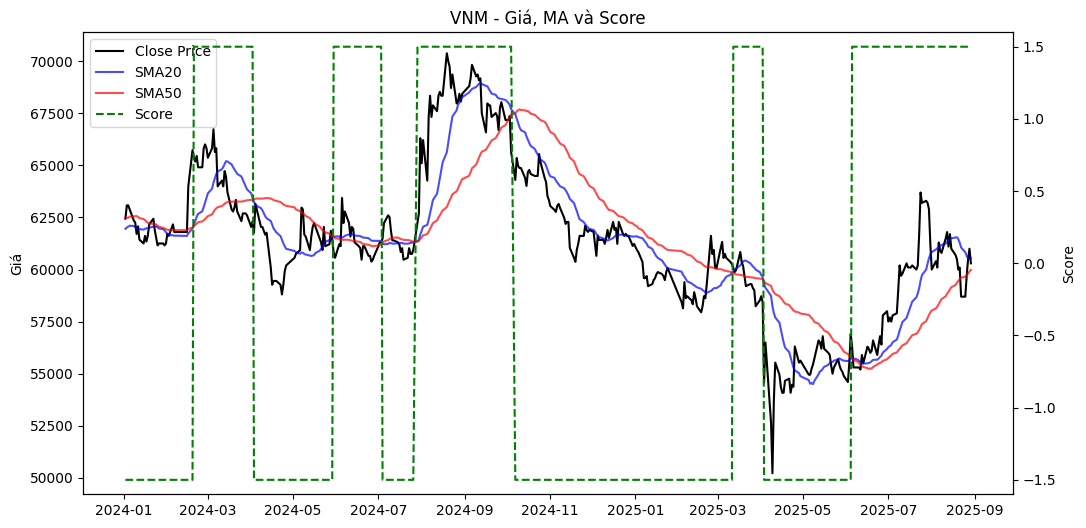

In [ ]:
#Điều kiện 1,2,3
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
hose = pd.read_csv(f"{save_path}/HOSE_with_TA.csv", parse_dates=["timestamp"])

# Chọn 1 mã cổ phiếu để minh họa
ticker = "VNM"
stock_df = hose[hose["ticker"] == ticker].copy()

# ---- Lọc dữ liệu chỉ từ năm 2024 ----
stock_df = stock_df[stock_df["timestamp"] >= "2024-01-01"].copy()

# Score theo quan hệ giữa SMA20 & SMA50
stock_df["score_MA"] = 0
stock_df.loc[stock_df["sma20"] > stock_df["sma50"], "score_MA"] = 1.5
stock_df.loc[stock_df["sma20"] < stock_df["sma50"], "score_MA"] = -1.5

# ----- Vẽ biểu đồ -----
fig, ax1 = plt.subplots(figsize=(12,6))

# Biểu đồ giá + MA
ax1.plot(stock_df["timestamp"], stock_df["close"], label="Close Price", color="black")
ax1.plot(stock_df["timestamp"], stock_df["sma20"], label="SMA20", color="blue", alpha=0.7)
ax1.plot(stock_df["timestamp"], stock_df["sma50"], label="SMA50", color="red", alpha=0.7)
ax1.set_ylabel("Giá")

# Trục phụ cho score
ax2 = ax1.twinx()
ax2.plot(stock_df["timestamp"], stock_df["score_MA"], label="Score", color="green", linestyle="--")
ax2.set_ylim(-1.6, 1.6)
ax2.set_ylabel("Score")

# Gom legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

plt.title(f"{ticker} - Giá, MA và Score")
plt.show()


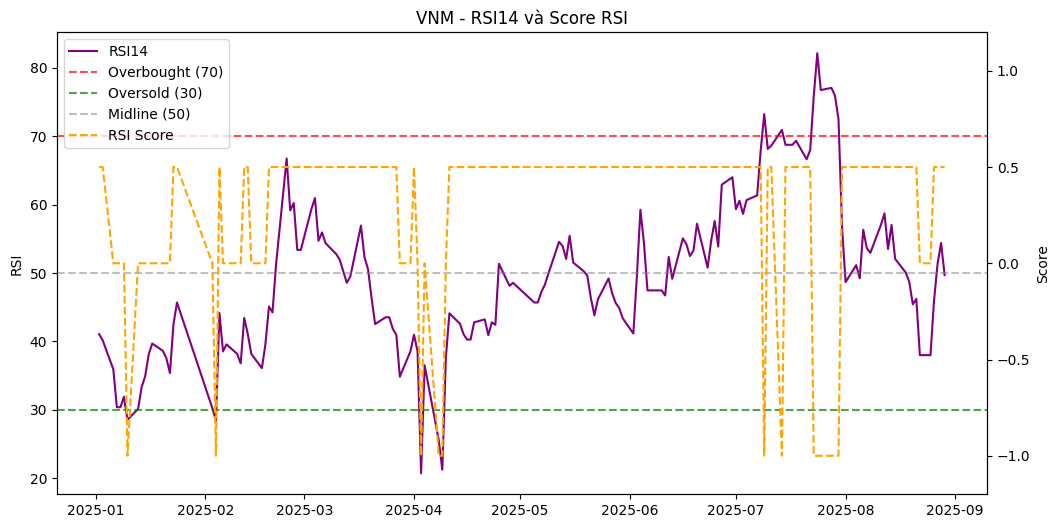

In [ ]:
#điều kiện 5,6,7
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu đã có chỉ báo (sau khi chạy add_indicators)
hose = pd.read_csv(f"{save_path}/HOSE_with_TA.csv", parse_dates=["timestamp"])

# Chọn 1 mã cổ phiếu để minh họa
ticker = "VNM"
stock_df = hose[hose["ticker"] == ticker].copy()

# ---- Lọc dữ liệu chỉ từ năm 2024 ----
stock_df = stock_df[stock_df["timestamp"] >= "2025-01-01"].copy()

# ----- Tạo score riêng cho RSI -----
stock_df["score_RSI"] = 0
stock_df.loc[(stock_df["rsi14"] >= 40) & (stock_df["rsi14"] <= 70), "score_RSI"] = 0.5
stock_df.loc[stock_df["rsi14"] > 70, "score_RSI"] = -1
stock_df.loc[stock_df["rsi14"] < 30, "score_RSI"] = -1

# ----- Vẽ biểu đồ -----
fig, ax1 = plt.subplots(figsize=(12,6))

# Trục chính: RSI
ax1.plot(stock_df["timestamp"], stock_df["rsi14"], label="RSI14", color="purple")
ax1.axhline(70, color="red", linestyle="--", alpha=0.7, label="Overbought (70)")
ax1.axhline(30, color="green", linestyle="--", alpha=0.7, label="Oversold (30)")
ax1.axhline(50, color="gray", linestyle="--", alpha=0.5, label="Midline (50)")
ax1.set_ylabel("RSI")

# Trục phụ: Score
ax2 = ax1.twinx()
ax2.plot(stock_df["timestamp"], stock_df["score_RSI"], label="RSI Score", color="orange", linestyle="--")
ax2.set_ylim(-1.2, 1.2)
ax2.set_ylabel("Score")

# Gom legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

plt.title(f"{ticker} - RSI14 và Score RSI")
plt.show()


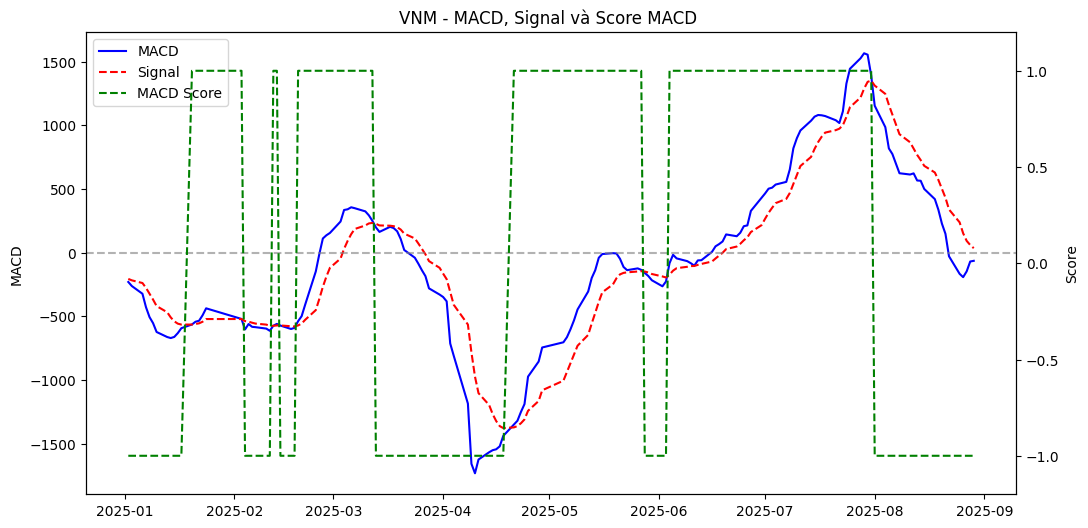

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu đã có chỉ báo
hose = pd.read_csv(f"{save_path}/HOSE_with_TA.csv", parse_dates=["timestamp"])

# Chọn 1 mã cổ phiếu để minh họa
ticker = "VNM"
stock_df = hose[hose["ticker"] == ticker].copy()

# ---- Lọc dữ liệu  ----
stock_df = stock_df[stock_df["timestamp"] >= "2025-01-01"].copy()

# ----- Tạo score riêng cho MACD -----
stock_df["score_MACD"] = 0
stock_df.loc[stock_df["macd"] > stock_df["macd_signal"], "score_MACD"] = 1
stock_df.loc[stock_df["macd"] <= stock_df["macd_signal"], "score_MACD"] = -1

# ----- Vẽ biểu đồ -----
fig, ax1 = plt.subplots(figsize=(12,6))

# Trục chính: MACD và Signal
ax1.plot(stock_df["timestamp"], stock_df["macd"], label="MACD", color="blue")
ax1.plot(stock_df["timestamp"], stock_df["macd_signal"], label="Signal", color="red", linestyle="--")
ax1.axhline(0, color="gray", linestyle="--", alpha=0.6)
ax1.set_ylabel("MACD")

# Trục phụ: Score
ax2 = ax1.twinx()
ax2.plot(stock_df["timestamp"], stock_df["score_MACD"], label="MACD Score", color="green", linestyle="--")
ax2.set_ylim(-1.2, 1.2)
ax2.set_ylabel("Score")

# Gom legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

plt.title(f"{ticker} - MACD, Signal và Score MACD ")
plt.show()


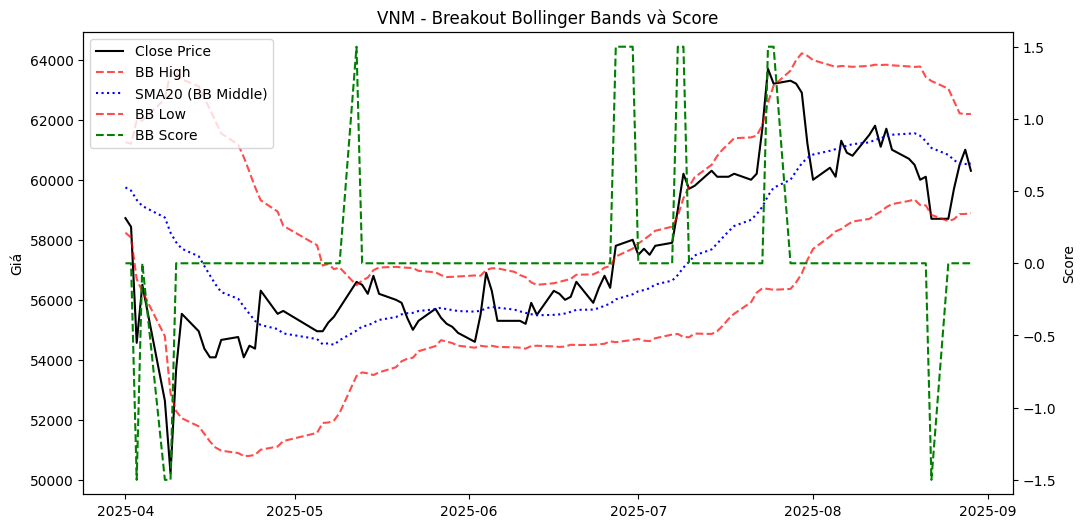

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu đã có chỉ báo
hose = pd.read_csv(f"{save_path}/HOSE_with_TA.csv", parse_dates=["timestamp"])

# Chọn 1 mã cổ phiếu để minh họa
ticker = "VNM"
stock_df = hose[hose["ticker"] == ticker].copy()

# ---- Lọc dữ liệu chỉ từ năm 2024 ----
stock_df = stock_df[stock_df["timestamp"] >= "2025-04-01"].copy()

# ----- Tạo score riêng cho Breakout Bollinger Bands -----
stock_df["score_BB"] = 0
stock_df.loc[stock_df["close"] > stock_df["bb_high"], "score_BB"] = 1.5
stock_df.loc[stock_df["close"] < stock_df["bb_low"], "score_BB"] = -1.5

# ----- Vẽ biểu đồ -----
fig, ax1 = plt.subplots(figsize=(12,6))

# Trục chính: Giá và Bollinger Bands
ax1.plot(stock_df["timestamp"], stock_df["close"], label="Close Price", color="black")
ax1.plot(stock_df["timestamp"], stock_df["bb_high"], label="BB High", color="red", linestyle="--", alpha=0.7)
ax1.plot(stock_df["timestamp"], stock_df["sma20"], label="SMA20 (BB Middle)", color="blue", linestyle=":")
ax1.plot(stock_df["timestamp"], stock_df["bb_low"], label="BB Low", color="red", linestyle="--", alpha=0.7)
ax1.set_ylabel("Giá")

# Trục phụ: Score
ax2 = ax1.twinx()
ax2.plot(stock_df["timestamp"], stock_df["score_BB"], label="BB Score", color="green", linestyle="--")
ax2.set_ylim(-1.6, 1.6)
ax2.set_ylabel("Score")

# Gom legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

plt.title(f"{ticker} - Breakout Bollinger Bands và Score")
plt.show()


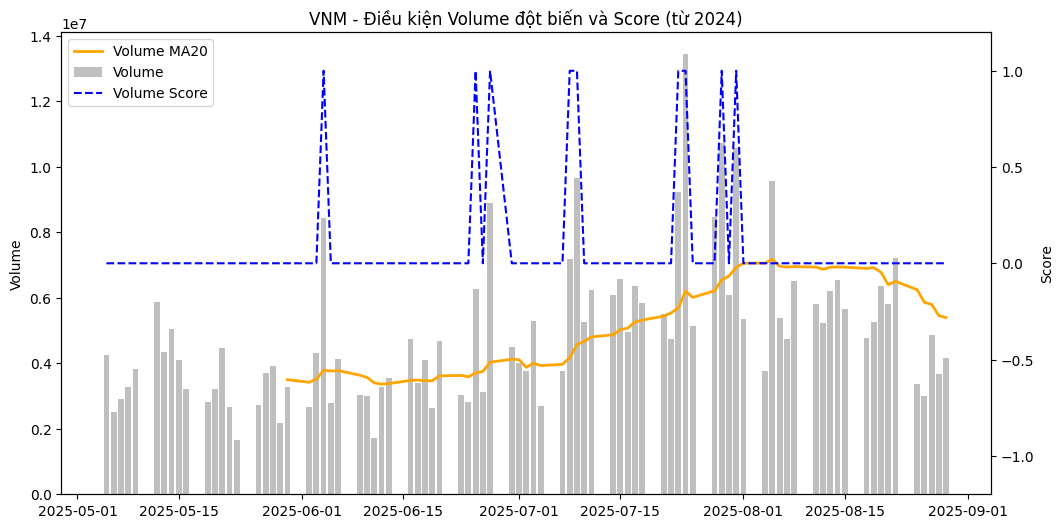

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
hose = pd.read_csv(f"{save_path}/HOSE_with_TA.csv", parse_dates=["timestamp"])

# Chọn 1 mã cổ phiếu
ticker = "VNM"
stock_df = hose[hose["ticker"] == ticker].copy()
stock_df = stock_df[stock_df["timestamp"] >= "2025-05-01"].copy()

# ----- Điều kiện Volume đột biến -----
stock_df["vol_ma20"] = stock_df["volume"].rolling(20).mean()

stock_df["score_Volume"] = 0
stock_df.loc[stock_df["volume"] > 1.5 * stock_df["vol_ma20"], "score_Volume"] = 1
stock_df.loc[stock_df["volume"] < 0.5 * stock_df["vol_ma20"], "score_Volume"] = -1

# ----- Vẽ biểu đồ -----
fig, ax1 = plt.subplots(figsize=(12,6))

# Trục chính: Volume thực tế + MA20
ax1.bar(stock_df["timestamp"], stock_df["volume"], label="Volume", color="grey", alpha=0.5)
ax1.plot(stock_df["timestamp"], stock_df["vol_ma20"], label="Volume MA20", color="orange", linewidth=2)
ax1.set_ylabel("Volume")

# Trục phụ: Score
ax2 = ax1.twinx()
ax2.plot(stock_df["timestamp"], stock_df["score_Volume"], label="Volume Score", color="blue", linestyle="--")
ax2.set_ylim(-1.2, 1.2)
ax2.set_ylabel("Score")

# Gom legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

plt.title(f"{ticker} - Điều kiện Volume đột biến và Score")
plt.show()


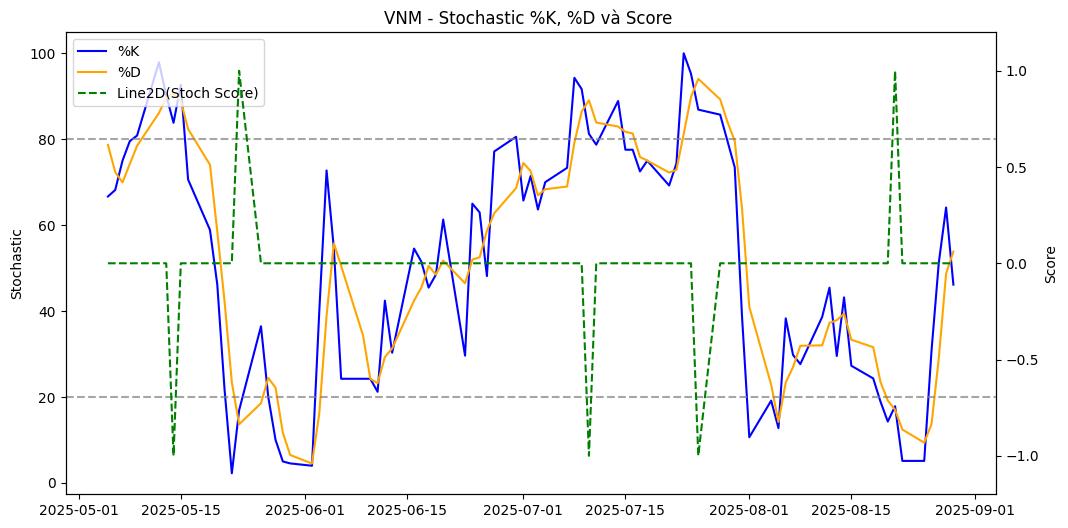

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu đã có chỉ báo
hose = pd.read_csv(f"{save_path}/HOSE_with_TA.csv", parse_dates=["timestamp"])

# Chọn 1 mã cổ phiếu để minh họa
ticker = "VNM"
stock_df = hose[hose["ticker"] == ticker].copy()

# ---- Lọc dữ liệu từ năm 2024 ----
stock_df = stock_df[stock_df["timestamp"] >= "2025-05-01"].copy()

# ----- Tạo score riêng cho Stochastic -----
stock_df["score_Stoch"] = 0

for i in range(1, len(stock_df)):
    # 12. Stoch %K cắt lên %D dưới 20
    if (
        stock_df["stoch_k"].iloc[i-1] <= stock_df["stoch_d"].iloc[i-1]
        and stock_df["stoch_k"].iloc[i] > stock_df["stoch_d"].iloc[i]
        and stock_df["stoch_k"].iloc[i] < 20
    ):
        stock_df.loc[stock_df.index[i], "score_Stoch"] = 1

    # 13. Stoch %K cắt xuống %D trên 80
    elif (
        stock_df["stoch_k"].iloc[i-1] >= stock_df["stoch_d"].iloc[i-1]
        and stock_df["stoch_k"].iloc[i] < stock_df["stoch_d"].iloc[i]
        and stock_df["stoch_k"].iloc[i] > 80
    ):
        stock_df.loc[stock_df.index[i], "score_Stoch"] = -1

# ----- Vẽ biểu đồ -----
fig, ax1 = plt.subplots(figsize=(12,6))

# Trục chính: %K và %D
ax1.plot(stock_df["timestamp"], stock_df["stoch_k"], label="%K", color="blue")
ax1.plot(stock_df["timestamp"], stock_df["stoch_d"], label="%D", color="orange")
ax1.axhline(20, color="grey", linestyle="--", alpha=0.7)
ax1.axhline(80, color="grey", linestyle="--", alpha=0.7)
ax1.set_ylabel("Stochastic")

# Trục phụ: Score
ax2 = ax1.twinx()
ax2.plot(stock_df["timestamp"], stock_df["score_Stoch"], label="Stoch Score", color="green", linestyle="--")
ax2.set_ylim(-1.2, 1.2)
ax2.set_ylabel("Score")

# Gom legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + lines2, loc="upper left")

plt.title(f"{ticker} - Stochastic %K, %D và Score ")
plt.show()


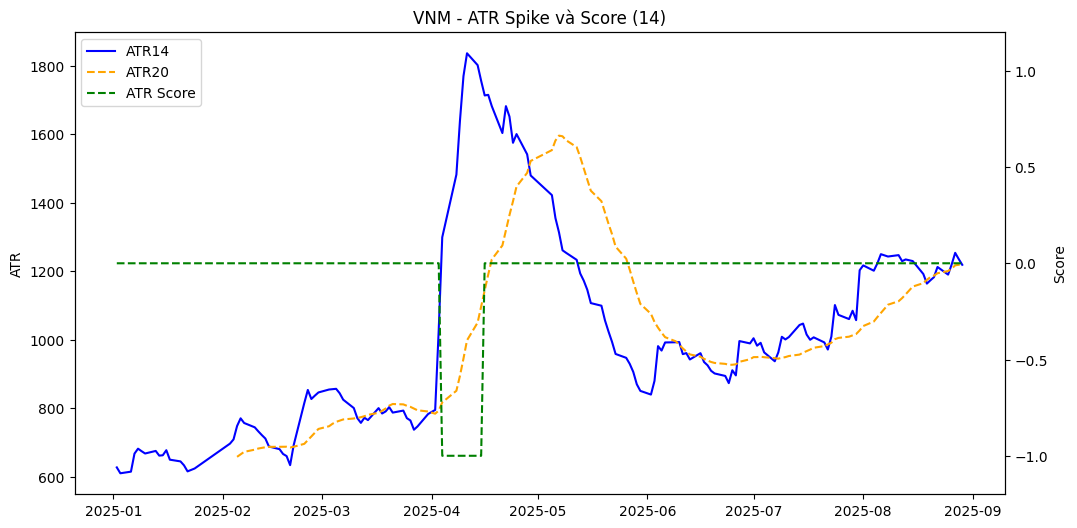

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu đã có chỉ báo
hose = pd.read_csv(f"{save_path}/HOSE_with_TA.csv", parse_dates=["timestamp"])

# Chọn 1 mã cổ phiếu để minh họa
ticker = "VNM"
stock_df = hose[hose["ticker"] == ticker].copy()

# ---- Lọc dữ liệu từ năm 2024 ----
stock_df = stock_df[stock_df["timestamp"] >= "2025-01-01"].copy()

# ----- Tạo score riêng cho ATR Spike -----
stock_df["atr20"] = stock_df["atr14"].rolling(window=20).mean()
stock_df["score_ATR"] = 0

stock_df.loc[stock_df["atr14"] > 1.5 * stock_df["atr20"], "score_ATR"] = -1

# ----- Vẽ biểu đồ -----
fig, ax1 = plt.subplots(figsize=(12,6))

# Trục chính: ATR và ATR20
ax1.plot(stock_df["timestamp"], stock_df["atr14"], label="ATR14", color="blue")
ax1.plot(stock_df["timestamp"], stock_df["atr20"], label="ATR20", color="orange", linestyle="--")
ax1.set_ylabel("ATR")

# Trục phụ: Score
ax2 = ax1.twinx()
ax2.plot(stock_df["timestamp"], stock_df["score_ATR"], label="ATR Score", color="green", linestyle="--")
ax2.set_ylim(-1.2, 1.2)
ax2.set_ylabel("Score")

# Gom legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

plt.title(f"{ticker} - ATR Spike và Score (14)")
plt.show()


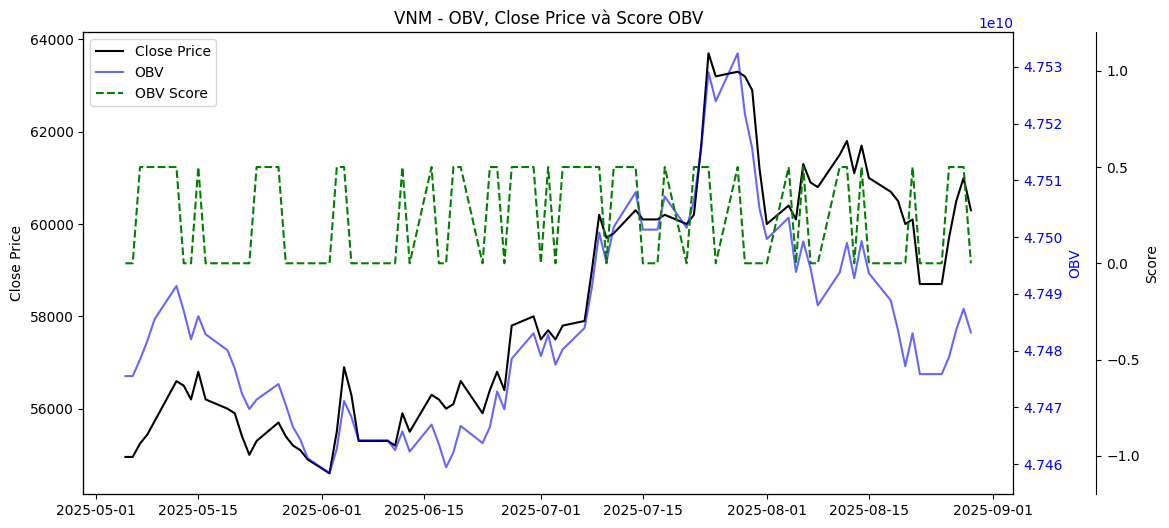

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu đã có chỉ báo
hose = pd.read_csv(f"{save_path}/HOSE_with_TA.csv", parse_dates=["timestamp"])

# Chọn 1 mã cổ phiếu để minh họa
ticker = "VNM"
stock_df = hose[hose["ticker"] == ticker].copy()

# ---- Lọc dữ liệu từ năm 2024 ----
stock_df = stock_df[stock_df["timestamp"] >= "2025-05-01"].copy()

# ----- Tạo score riêng cho OBV -----
stock_df["score_OBV"] = 0

# OBV Confirm: OBV tăng cùng giá → +0.5
stock_df.loc[
    (stock_df["obv"] > stock_df["obv"].shift(1)) &
    (stock_df["close"] > stock_df["close"].shift(1)),
    "score_OBV"
] = 0.5

# OBV Diverge: Giá tăng nhưng OBV giảm → -1
stock_df.loc[
    (stock_df["close"] > stock_df["close"].shift(1)) &
    (stock_df["obv"] < stock_df["obv"].shift(1)),
    "score_OBV"
] = -1

# ----- Vẽ biểu đồ -----
fig, ax1 = plt.subplots(figsize=(12,6))

# Trục chính: Close và OBV
ax1.plot(stock_df["timestamp"], stock_df["close"], label="Close Price", color="black")
ax1.set_ylabel("Close Price", color="black")
ax1.tick_params(axis="y", labelcolor="black")

ax3 = ax1.twinx()
ax3.plot(stock_df["timestamp"], stock_df["obv"], label="OBV", color="blue", alpha=0.6)
ax3.set_ylabel("OBV", color="blue")
ax3.tick_params(axis="y", labelcolor="blue")

# Trục phụ: Score OBV
ax2 = ax1.twinx()
ax2.spines["right"].set_position(("outward", 60))  # đẩy score ra ngoài để không bị chồng
ax2.plot(stock_df["timestamp"], stock_df["score_OBV"], label="OBV Score", color="green", linestyle="--")
ax2.set_ylim(-1.2, 1.2)
ax2.set_ylabel("Score")

# Gom legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()
lines3, labels3 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc="upper left")

plt.title(f"{ticker} - OBV, Close Price và Score OBV")
plt.show()


In [ ]:
import os
import pandas as pd
from FiinQuantX import FiinSession

save_path = "/content/stock_data"
os.makedirs(save_path, exist_ok=True)
print("Folder lưu dữ liệu:", save_path)

def get_ratios_by_exchange(exchange_name, filename):
    tickers = client.TickerList(ticker=exchange_name)
    all_data = []

    for t in tickers:
        try:
            ratios_data = client.FundamentalAnalysis().get_ratios(
                tickers=[t],
                TimeFilter="Quarterly",
                LatestYear=2024,
                NumberOfPeriod=4,
                Consolidated=True,
                Fields=[
                    "ValuationRatio.PE",
                    "ValuationRatio.PB",
                    "ProfitabilityRatio.ROE",
                    "PerShareIndicator.EPS"
                ]
            )
            if ratios_data:
                for row in ratios_data:
                    row["ticker"] = t  # gắn mã vào kết quả
                    all_data.append(row)
        except Exception as e:
            print(f"Bỏ qua {t} vì lỗi: {e}")

    df = pd.DataFrame(all_data)
    file_path = os.path.join(save_path, filename)
    df.to_csv(file_path, index=False, encoding="utf-8-sig")
    print(f"Đã lưu dữ liệu ratios cho {exchange_name} vào {file_path}")

# Lấy dữ liệu cho 3 sàn
get_ratios_by_exchange("VNINDEX", "HOSE_ratios.csv")
get_ratios_by_exchange("HNXINDEX", "HNX_ratios.csv")
get_ratios_by_exchange("UPCOMINDEX", "UPCOM_ratios.csv")


Folder lưu dữ liệu: /content/stock_data
Bỏ qua FUETPVND vì lỗi: 'FUETPVND'


KeyboardInterrupt: 